# TAREA EXAMEN I

## Problema 1

Se tiene un oscilador armonico en dos dimensiones $(xy)$ el que la fuerza está dada por $\vec{F} = -k\vec{r}$ y se
tiene una fricción $\vec{f}_{fric}=-\gamma\vec{v}$ si $\lvert v\rvert<1$ pero cuando $\lvert v\rvert>1$ la fricción es $\vec{f}_{fric}=-\mu v^{3/2}\hat{v}$. Si $m=1$, $\gamma=0.1$ y $\mu=0.2$ resuelva las siguientes ejercicios:

(a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas y polares.

(b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec{r_0}=(0,1)$ y $\vec{v_0}=(cos\theta,sin\theta)$, donde $\theta=\frac{n\pi}{6}$ con $n=0,1,2,3,...,10,11$.

(c) La energía para las distintas condiciones iniciales y detenga la simulación cuando ésta sea menor al $1\%$ de su valor inicial.

(d) Dibuje las gráficas del momento angular para los casos anteriores.

(e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase $(p_x,x)$ y $(p_\rho,\rho)$


Sabemos que 
$$\vec{F}_{total}=\vec{F}+\vec{f}_{fric}$$
entones si $\lvert v\rvert<1$ tenemos que
$$\vec{F}_{total}=-k\vec{r}-\gamma\vec{v}$$
pero $\vec{F}_{total}=m\vec{a}$ además $\vec{a}=\frac{d²\vec{r}}{dt²}$ y $\vec{v}=\frac{d\vec{r}}{dt}$ por tanto la ecuación anterior resulta ser:

$$m\frac{d²\vec{r}}{dt²}=-k\vec{r}-\gamma\frac{d\vec{r}}{dt} $$


Es decir $$m\ddot{\vec{r}}=-k\vec{r}-\gamma\dot{\vec{r}}$$

sabemos además que: $\vec{r}=x\hat{i}+y\hat{j}$

luego:  $$m\ddot{x}+\gamma\dot{x}+kx=0$$
$$m\ddot{y}+\gamma\dot{y}+ky=0$$

entonces dividiendo entre llegamos a lo siguiente: $$\ddot{x}+\frac{\gamma}{m}\dot{x}+\frac{k}{m}x=0$$
$$\ddot{y}+\frac{\gamma}{m}\dot{y}+\frac{k}{m}y=0$$

Lo expongo de esta forma para denotar que existe una solución analítica al problema. Para ello proponemos la solución $x(t) = e^{rx}$ y $y(t)=e^{ry}$ dónde:
$$\dot{x}=re^{rx}  \land \dot{y}=re^{ry}$$
$$\ddot{x}=r^2e^{rx} \land \ddot{y}=r^2e^{ry}$$

Podemos calcularla pero nos es inutil para fines prácticos.

In [7]:
from pylab import *
%matplotlib inline
import random

In [8]:
# Tomaremos RK4 que creamos con anterioridad
def rk4(ec,p_ini,x,args=0,h=0.01): 
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    print sol[0,:]
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [9]:
def mov_part(r_v,t,g=0,m=1):
    dx=r_v[2]
    dy=r_v[3]
    dvx,dvy=0,-g # la fuerza gravitacional es en direccion perpendicular y sentido negativo
    return array([dx,dy,dvx,dvy])

In [10]:
#Se define los rebotes a realizar de la partícula de la circunferencicia de radio b
def rebote_r_b(r_v_i,mi_dt,b): #r_v_i es trayectori[i,:]
    dt_busqueda=(mi_dt)/2
    y_izq=r_v_i #obtenido de la trayectoria inicial
    t,sol=rk4(mov_part,r_v_i,[0,dt_busqueda])
    y_med=sol[-1,:] #resultado de haber integrado a la mitad, ultimo punto se queda
    r_1=sqrt((y_izq[0])**2+(y_izq[1])**2)
    while r_1>b: #vector posicion de la particula esta fuera de la circunferencia 
        reinicio=y_med
        dt_busqueda=dt_busqueda/2
        t,sol=rk4(mov_part,reinicio,[0,dt_busqueda])
        y_izq=reinicio
        y_med=sol[-1,:]
        r_1=sqrt((y_izq[0])**2+(y_izq[1])**2)
    vec_per=-y_izq[0],-y_izq[1] #vector perpendicular a la circunferencia exterior
    alpha=arccos((-vec_per[0]*y_izq[2]-vec_per[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_per[0]**2+vec_per[1]**2)))
    #Angulo entre el vector negativo de la velocidad  y el vector perpendicular a la superfice de rebote
    
    vec_tan=vec_per[1],-vec_per[0]  #vector tangencial a la circunferencia exterior 
    theta=arccos((-vec_tan[0]*y_izq[2]-vec_tan[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_tan[0]**2+vec_tan[1]**2)))
    #Angulo entre el vector  negativo de la velocidad  y el vector tangencial a la superfice de rebote   
    
    if theta>(pi/2): # Si el angulo auxiliar es mayor a 90° el vector revotara en un angulo negativo respecto al vector normal
        alpha=-alpha
    else:        
        alpha=alpha    
    rot_vel=-cos(2*alpha)*(y_izq[2])+sin(2*alpha)*(y_izq[3]) #rotacion de 2alpha aplicada al vector velocidad  
    rot_per=-sin(2*alpha)*(y_izq[2])-cos(2*alpha)*(y_izq[3]) # repecto al vector perpendicular a la circunferencia interior
    y_izq=array([y_izq[0],y_izq[1],rot_vel,rot_per])  
    return y_izq


In [11]:
#Se define los rebotes a realizar de la partícula de la circunferencicia de radio a
def rebote_r_a(r_v_i,mi_dt,b): #r_v_i es trayectori[i,:]
    dt_busqueda=(mi_dt)/2
    y_izq=r_v_i #obtenido de la trayectoria inicial
    t,sol=rk4(mov_part,r_v_i,[0,dt_busqueda])
    y_med=sol[-1,:] #resultado de haber integrado a la mitad, ultimo punto se queda
    r_1=sqrt((y_izq[0])**2 + (y_izq[1])**2)
    while r_1<a: #vector posicion de la particula esta dentro de la circunferencia 
        reinicio=y_med
        dt_busqueda=dt_busqueda/2
        t,sol=rk4(mov_part,reinicio,[0,dt_busqueda])
        y_izq=reinicio
        y_med=sol[-1,:]
        r_1=sqrt((y_izq[0])**2+(y_izq[1])**2)
    vec_per=-y_izq[0],-y_izq[1] #vector perpendicular a la circunferencia interior
    alpha=arccos((-vec_per[0]*y_izq[2]-vec_per[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_per[0]**2+vec_per[1]**2)))
    #Angulo entre el vector negativo de la velocidad  y el vector perpendicular a la superfice de rebote
    
    vec_tan=vec_per[1],-vec_per[0]  #vector tangencial a la circunferencia interior 
    theta=arccos((-vec_tan[0]*y_izq[2]-vec_tan[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_tan[0]**2+vec_tan[1]**2)))
    # Angulo entre el vector  negativo de la velocidad  y el vector tangencial a la superfice de rebote   
    
    if theta>(pi/2): # Si el angulo auxiliar es mayor a 90° el vector revotara en un angulo negativo respecto al vector normal
        alpha=-alpha
    else:        
        alpha=alpha    
    rot_vel=-cos(2*alpha)*(y_izq[2])+sin(2*alpha)*(y_izq[3]) #rotacion de 2alpha aplicada al vector velocidad  
    rot_per=-sin(2*alpha)*(y_izq[2])-cos(2*alpha)*(y_izq[3]) # repecto al vector perpendicular a la circunferencia interior
    y_izq=array([y_izq[0],y_izq[1],rot_vel,rot_per])   
    return y_izq

In [12]:
#Se define la caja circular de radios a y b, tales que b=2a
def caja_circ(x,y,vx,vy,N,g,a,b): # (x,y,vx,vy) posicion y velocidad inicial de la particula, N es numero de puntos a calcular dentro de la trayectoria
    rebotes=0 # contador de rebotes
    inicio=[x,y,vx,vy] # condiciones iniciales de la pelota 
    trayectoria=zeros((N,len(inicio)))
    mi_dt=0.01
    trayectoria[0,:]=array(inicio)
    for i in range(N-1):
        t,sol_dt=rk4(mov_part,trayectoria[i,:],[0,mi_dt],g) #Integrador rk4 encuentra la trayectoria
        r=sqrt((sol_dt[-1,:][1])**2+(sol_dt[-1,:][0])**2)
        if r>b: #posicion en y de la particula es mayor a la circunferencia de radio b, la particula rebota
            punto=rebote_r_b(trayectoria[i,:],mi_dt,b)
            trayectoria[i+1,:]=punto 
            rebotes +=1
        else:
            trayectoria[i+1,:]=sol_dt[-1,:]      
        if r<a: #posicion en y de la particula es menor a la circunferencia de radio a, la particula rebota
            punto=rebote_r_a(trayectoria[i,:],mi_dt,a)
            trayectoria[i+1,:]=punto 
            rebotes +=1 # se agrega un contador a rebotes por cada rebote
    print "Numero de rebotes =",rebotes
    return trayectoria[:,0],trayectoria[:,1],trayectoria[:,2],trayectoria[:,3]

Numero de rebotes = 161


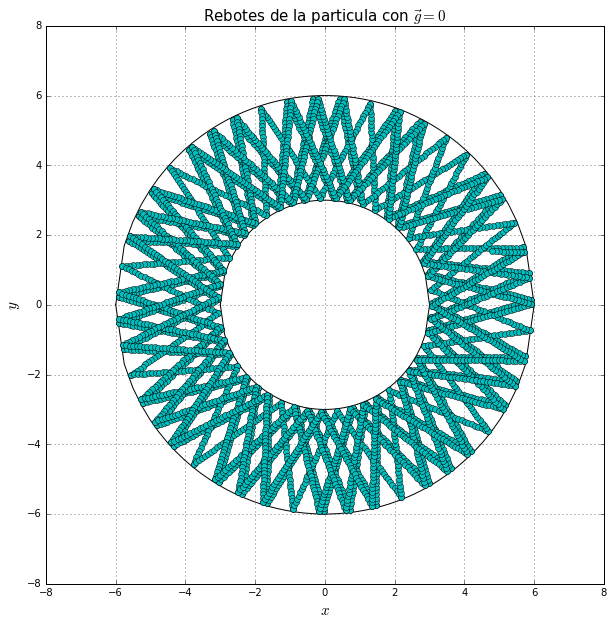

In [35]:
#Se grafican las trayectorias de los rebotes dados por la particula en caja circular
#de tal manera que la gravedad es nula
fig=figure(figsize=(10,10))
xlim([-8,8]),ylim([-8,8])
a=3 #radio de la circunferencia interior
b=2*a #radio de la circunferencia exterior
sol=caja_circ(1,3,-2,10,5000,0,a,b) #condiciones iniciales arbitrarias para caja circular
#Se grafica la caja circular
x,y,u,v=linspace(-b,b),linspace(-b,b),linspace(-a,a),linspace(-a,a)
plot(x,sqrt(-x**2+b**2),'black')
plot(y,-sqrt(-y**2+b**2),'black')
plot(u,sqrt(-u**2+a**2),'black')
plot(v,-sqrt(-v**2+a**2),'black')
plot(sol[0],sol[1],'-o',color='c') #grafica los puntos de la trayectoria 
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
grid(True)
title('Rebotes de la particula con $\\vec{g}=0$',fontsize=15)
show()

Numero de rebotes = 75


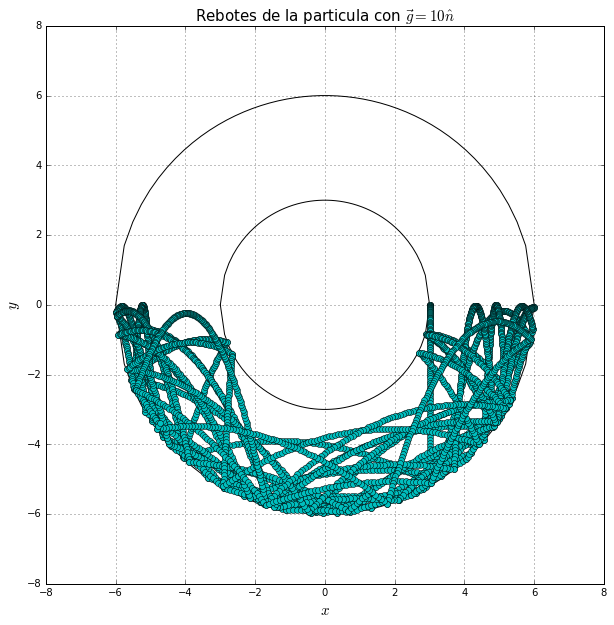

In [36]:
#Se grafican las trayectorias de los rebotes dados por la particula en caja circular
#de tal manera que la gravedad es nula
fig=figure(figsize=(10,10))
xlim([-8,8]),ylim([-8,8])
a=3 #radio de la circunferencia interior
b=2*a #radio de la circunferencia exterior
sol=caja_circ(3,0,0,0,5000,10,a,b) #condiciones iniciales arbitrarias para caja circular
#Se grafica la caja circular
x,y,u,v=linspace(-b,b),linspace(-b,b),linspace(-a,a),linspace(-a,a)
plot(x,sqrt(-x**2+b**2),'black')
plot(y,-sqrt(-y**2+b**2),'black')
plot(u,sqrt(-u**2+a**2),'black')
plot(v,-sqrt(-v**2+a**2),'black')
plot(sol[0],sol[1],'-o',color='c') #grafica los puntos de la trayectoria 
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
grid(True)
title('Rebotes de la particula con $\\vec{g}=10\\hat{n}$',fontsize=15)
show()

In [ ]:
from JSAnimation import IPython_display
from matplotlib import animation

In [4]:
#Sin la funcion init, la funcion init encima las cosas, de tal manera que va borrando y sobreponiendo en un solo cuadro
fig=figure(figsize=(10,10)) #crea una figura, y plot genera una figura donde es una variable, al ejecutar muestra la memoria donde lo guardo
ejes=axes(xlim=(-8,8),ylim=(-8,8)) #limites asociados a axes, argumentos de funciones, no actuan como funcion
#a diferencia de corchetes, es una funcion evaluada, en este caso se le asigna el valor.
circle,=ejes.plot(x,sqrt(-x**2+b**2),'black'),
plot(y,-sqrt(-y**2+b**2),'black'),
plot(u,sqrt(-u**2+a**2),'black'),
plot(v,-sqrt(-v**2+a**2),'black')
grid(True)
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
grid(True)
title('Simulacion de Rebotes con $\\vec{g}=10\\hat{n}$',fontsize=15)
trayectoria,=ejes.plot([],[]) #la coma es para que se comporte como apuntador, a ejes pegarle una grafica, con plot vaío
punto,=ejes.plot([],[],'-o',color='c')# a ejes se le agrega un punto
def init():# funcion opcional, ya que mas abajo entra en un argumento, lo cual hace que a la trayectoria le manda datos vacios.    
    trayectoria.set_data([],[]) #caen datos vacios, funcion de inicio-datos nulos
    punto.set_data([],[])
    return trayectoria,punto,
def el_movimiento(i):#hacer dibujos, se le asigna las soluciones, 
#diciendo que le trayectoria se le pone hasta un valor i.esimo mas uno, los cuales daran en el plot con argumentos vacios
    y,v=sol[0],sol[1]
    trayectoria.set_data(y[:i+1],v[:i+1]) #pasa datos a traves de la trayectoria y los manda al plot
    punto.set_data(y[i],v[i])# se le asigna con valor i-esimo
    return trayectoria,punto,
animation.FuncAnimation(fig,el_movimiento,init_func=init,frames=2500,interval=40) # entorno, con que hacer dibujos, de donde partir "borron y cuenta nueva"
#agarra la figura con los argumentos, lo cual hace 100 cuadros, es decir 100 graficas el numero de frames

NameError: name 'figure' is not defined